In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Load Dataset
df = pd.read_csv("data/customer_segmentation_data.csv")  # replace with your file name

In [5]:
# 3. Initial data visualization

print(df.head())
print(df.info())
print(df.describe())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id           

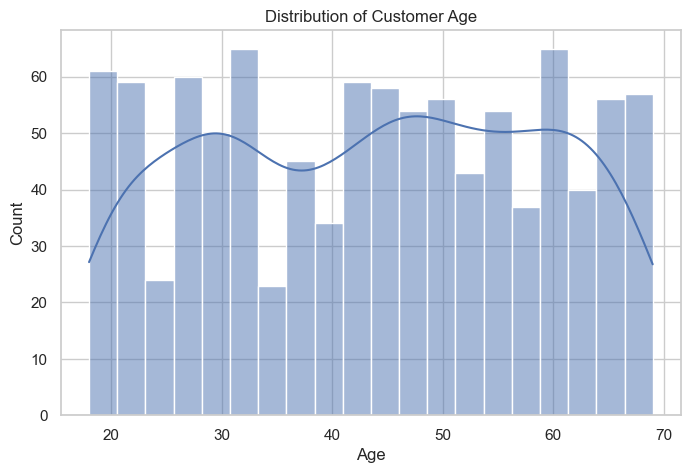

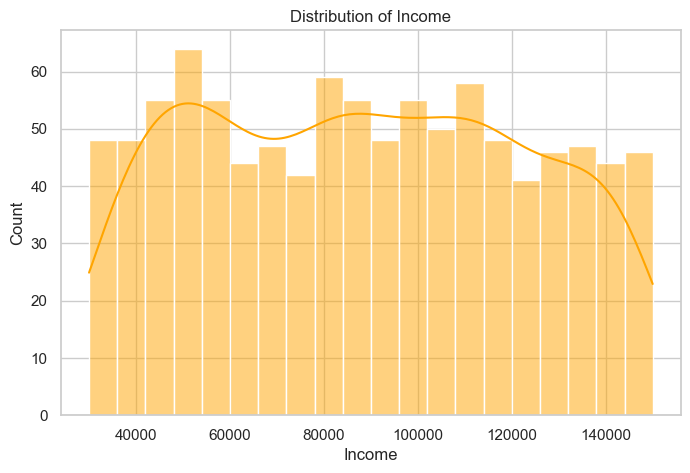

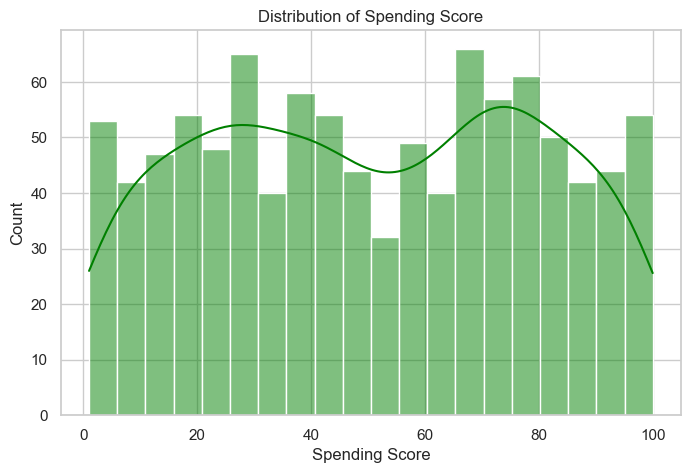

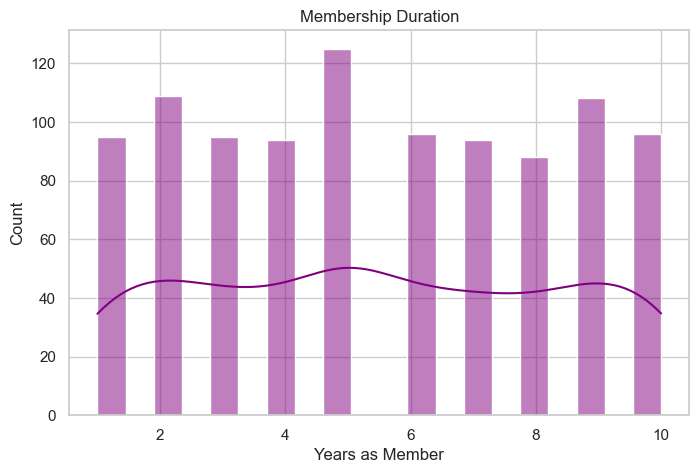

C:\Users\anush\AppData\Local\Temp\ipykernel_12192\1971048582.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


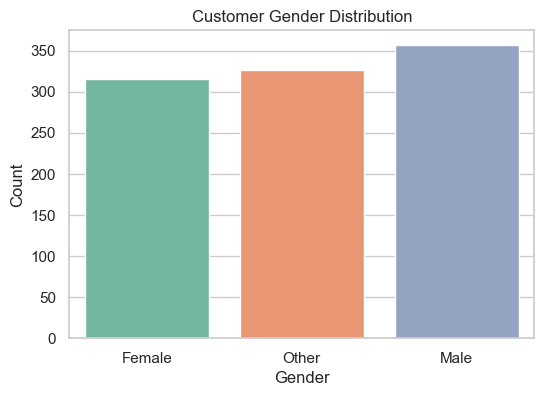

C:\Users\anush\AppData\Local\Temp\ipykernel_12192\1971048582.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='preferred_category', palette='Set3')


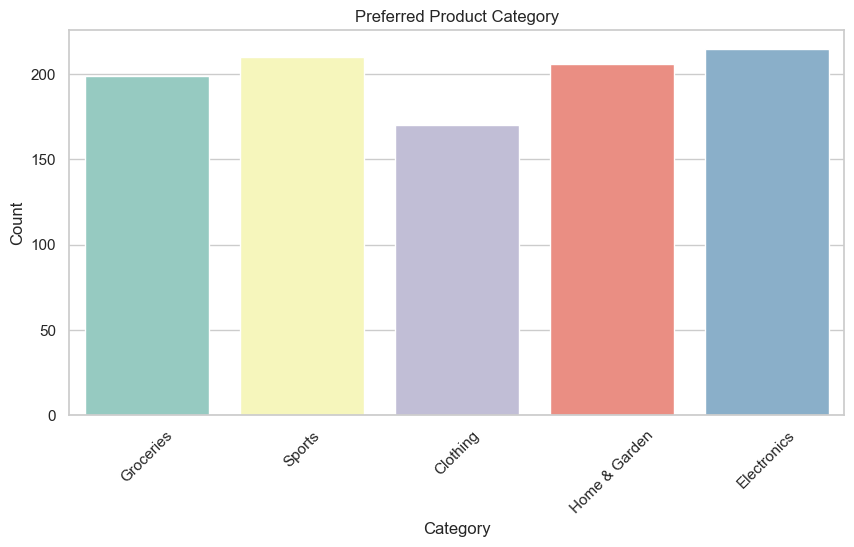

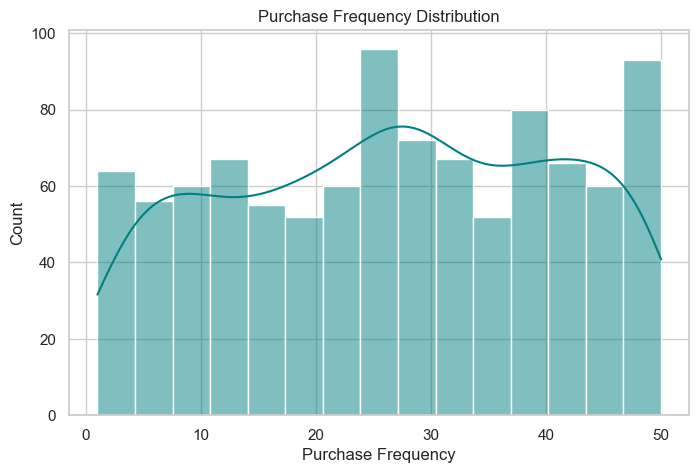

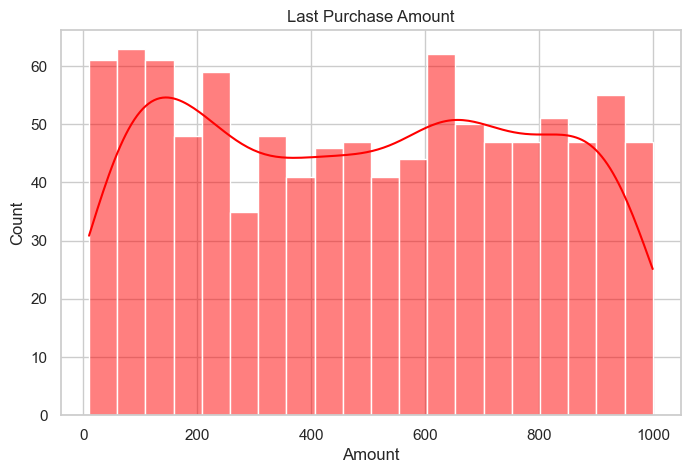

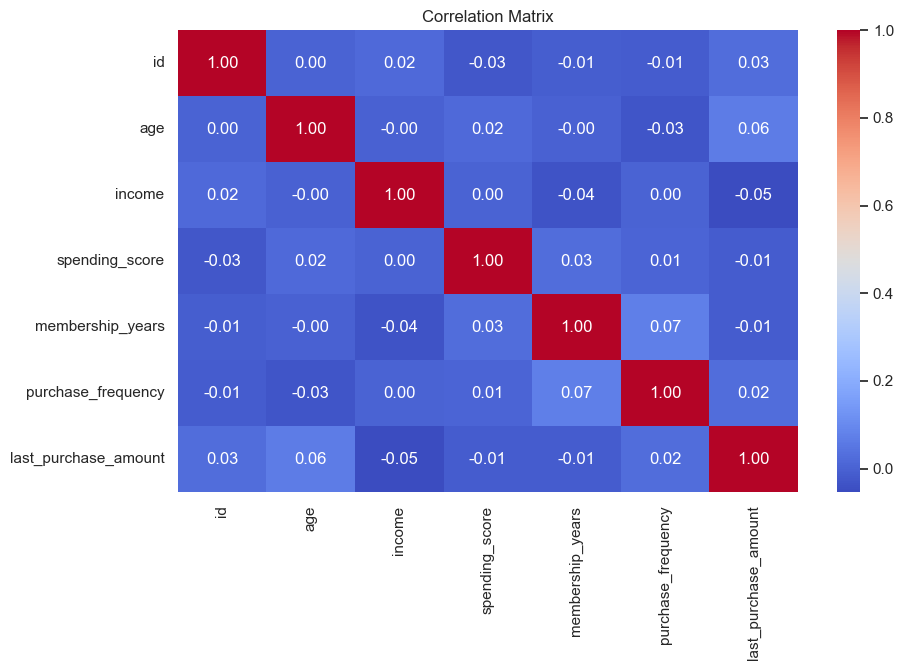

C:\Users\anush\AppData\Local\Temp\ipykernel_12192\1971048582.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='last_purchase_amount', palette='pastel')


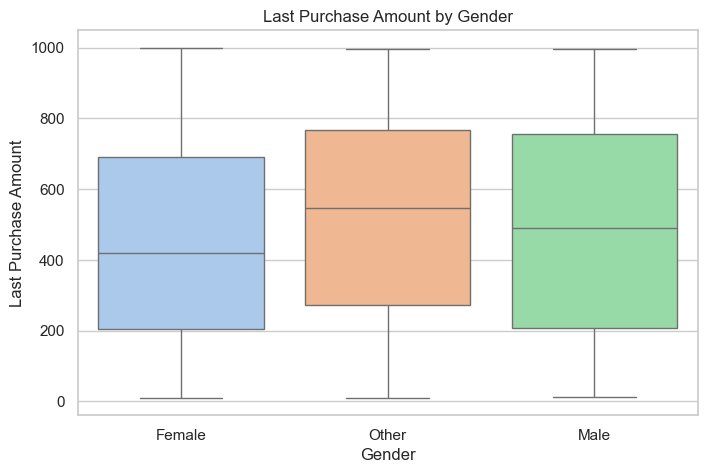

C:\Users\anush\AppData\Local\Temp\ipykernel_12192\1971048582.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='preferred_category', y='spending_score', palette='muted')


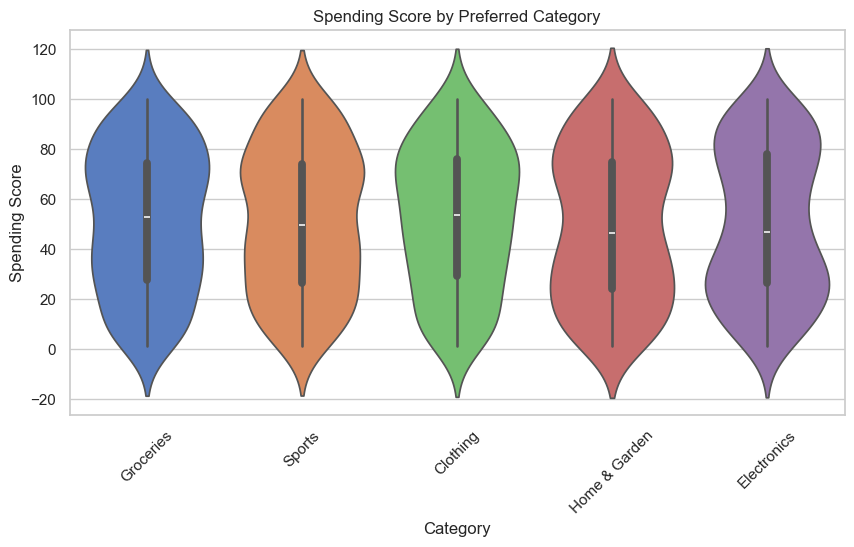

In [6]:
# ===========================
# Exploratory Data Analysis (EDA)
# ===========================

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# 3.1 Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3.2 Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['income'], bins=20, kde=True, color='orange')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# 3.3 Spending Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['spending_score'], bins=20, kde=True, color='green')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()

# 3.4 Membership Years Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['membership_years'], bins=20, kde=True, color='purple')
plt.title("Membership Duration")
plt.xlabel("Years as Member")
plt.ylabel("Count")
plt.show()

# 3.5 Gender Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3.6 Preferred Category Count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='preferred_category', palette='Set3')
plt.title("Preferred Product Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 3.7 Purchase Frequency Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['purchase_frequency'], bins=15, kde=True, color='teal')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.show()

# 3.8 Last Purchase Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['last_purchase_amount'], bins=20, kde=True, color='red')
plt.title("Last Purchase Amount")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

# 3.9 Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# 3.10 Boxplot: Last Purchase Amount by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='last_purchase_amount', palette='pastel')
plt.title("Last Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Last Purchase Amount")
plt.show()

# 3.11 Violin Plot: Spending Score by Preferred Category
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='preferred_category', y='spending_score', palette='muted')
plt.title("Spending Score by Preferred Category")
plt.xlabel("Category")
plt.ylabel("Spending Score")
plt.xticks(rotation=45)
plt.show()


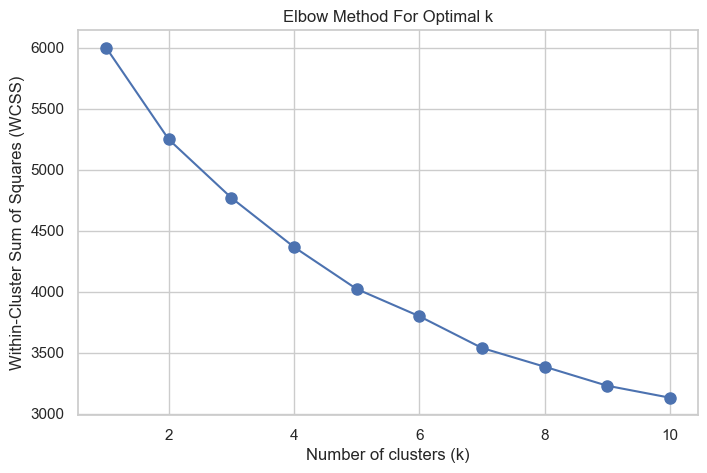

Average Silhouette Score per Segment:
Segment
0    0.126453
1    0.108044
2    0.137530
3    0.128237
Name: Silhouette, dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

# 1. Select numerical features for clustering
features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
X = df[features]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Use the Elbow Method to find optimal k
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

# 4. Choose k (e.g., k=4 based on elbow plot) and fit KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, df['Segment'])

# Add scores to DataFrame
df['Silhouette'] = sample_silhouette_values

# Print average silhouette score per segment
avg_scores = df.groupby('Segment')['Silhouette'].mean()
print("Average Silhouette Score per Segment:")
print(avg_scores)

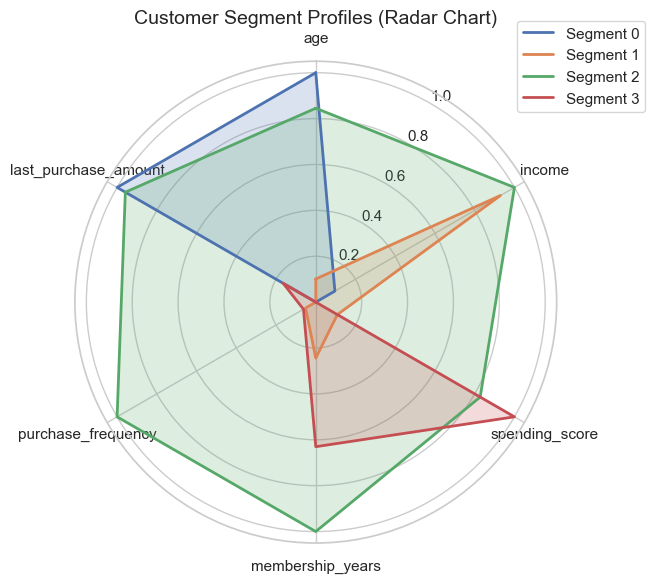

In [15]:


# Features used for clustering
features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

# Compute mean values per segment
segment_profiles = df.groupby('Segment')[features].mean()

# Normalize values to [0, 1] for radar plot
min_vals = segment_profiles.min()
max_vals = segment_profiles.max()
normalized_profiles = (segment_profiles - min_vals) / (max_vals - min_vals)

# Radar chart setup
labels = features
num_vars = len(labels)

# Angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Create radar plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i, row in normalized_profiles.iterrows():
    values = row.tolist()
    values += values[:1]  # loop back
    ax.plot(angles, values, label=f'Segment {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

# Format plot
ax.set_title("Customer Segment Profiles (Radar Chart)", fontsize=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(180 / num_vars)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()
